# Respondent nr 309
- hvor ligger respondent nr 309 i forhold til resten af stikprøven?
 
- hvorfor 309, når der kun var 307 i rapporten?

#### Setup

In [375]:
# Load necessary libraries
library(tidyverse) # for data manipulation
library(readxl) # for reading excel files

# Load the data
data <- read_excel("data/cleanSurveyData20240625.xlsx")

#### Hvem er nr 309?

In [376]:
# When?
data[308,2:3]

# Professional or Hobbyist?
data[308,5]

# Priamary area?
data[308,6]

Start time,Completion time
<dttm>,<dttm>
2024-06-21 12:10:25,2024-06-21 12:12:30


Do you consider yourself a professional or a hobbyist in game development?
<chr>
Hobbyist


Primary area of work?
<chr>
Art & Assets


#### Hvad er nr 309 generelle holdning til GenAI?

In [377]:
# What did nr 309 answer?
data[308,10]

Overall stance on Generative AI?2
<chr>
Very negative


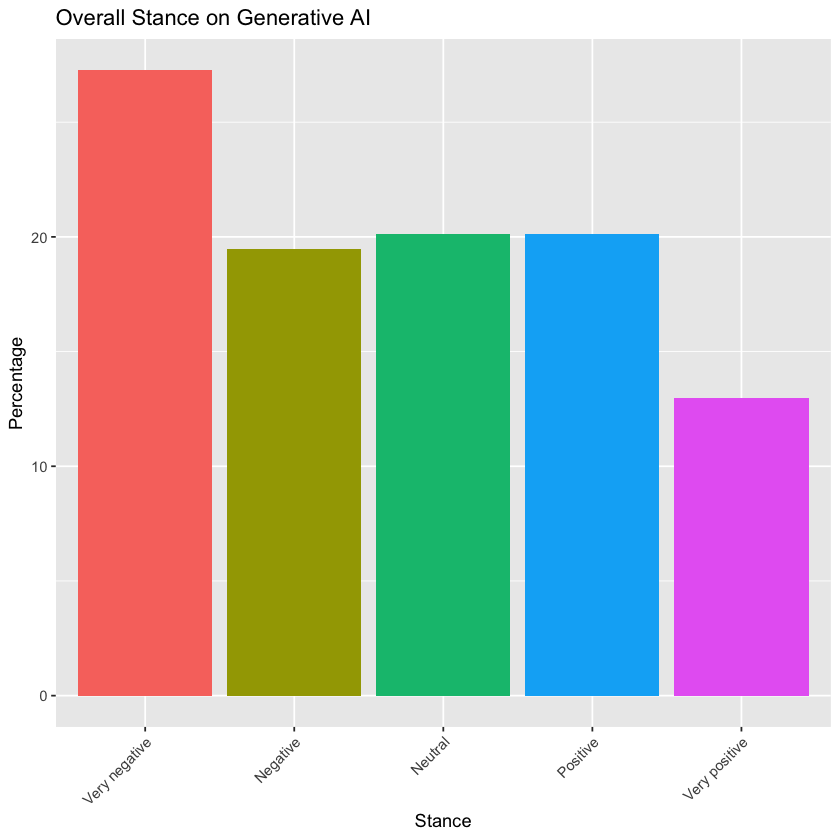

In [378]:
library(ggplot2)

# Define the correct order for the levels
stance_levels <- c(
  "Very negative",
  "Negative",
  "Neutral",
  "Positive",
  "Very positive"
)

# Convert the 'Overall stance on Generative AI?2' column
# to a factor with specified levels
data[[10]] <- factor(data[[10]], levels = stance_levels)

# Descriptive analysis: Overall stance on Generative AI
stance_distribution <- table(data[[10]])

# Convert counts to percentages
stance_distribution_percent <- prop.table(stance_distribution) * 100

# Create a data frame for the stance distribution
df_stance <- as.data.frame(stance_distribution_percent)
colnames(df_stance) <- c("Stance", "Percentage")

# Plotting the overall stance on Generative AI as percentages
ggplot(df_stance, aes(x = Stance, y = Percentage, fill = Stance)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Overall Stance on Generative AI",
    x = "Stance",
    y = "Percentage"
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
  )


#### Bruger nr 309 GenAI?

In [379]:
# Show answer 309 to "Do you use Generative AI in your work?"
data[308,23]

Do you use Generative AI in your work?
<chr>
No


Do you use Generative AI in your work?
 No Yes 
190 118 

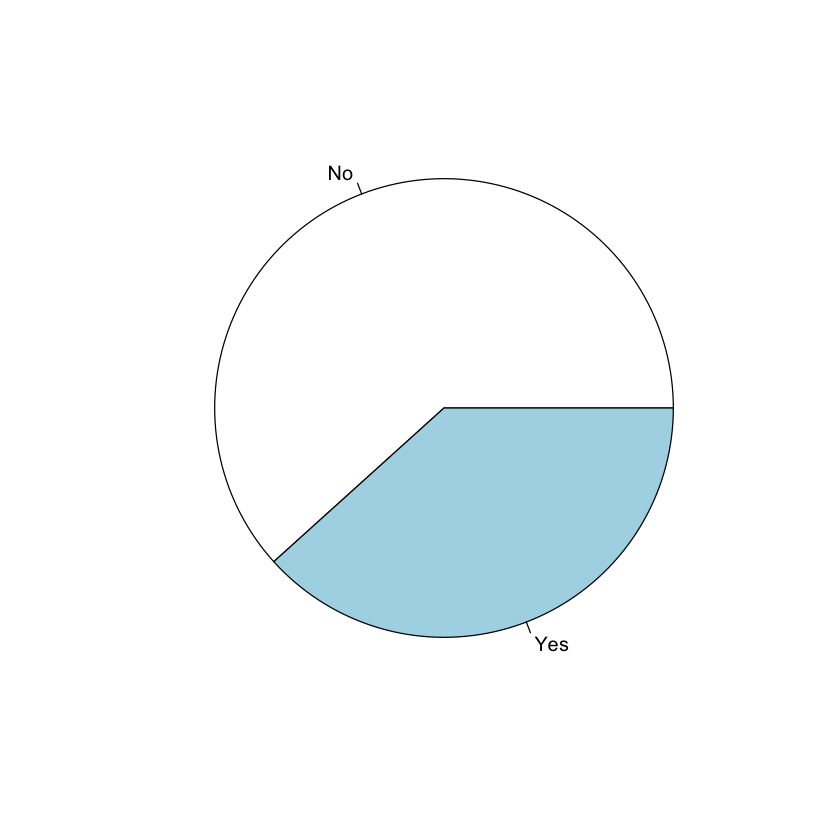

In [380]:
# Show count of answers to "Do you use Generative AI in your work?"
table(data[23])

# Show as a Pie Chart
pie(table(data[23]))

#### Hvor enig er nr 309 i de følgende udsagn om GenAI?

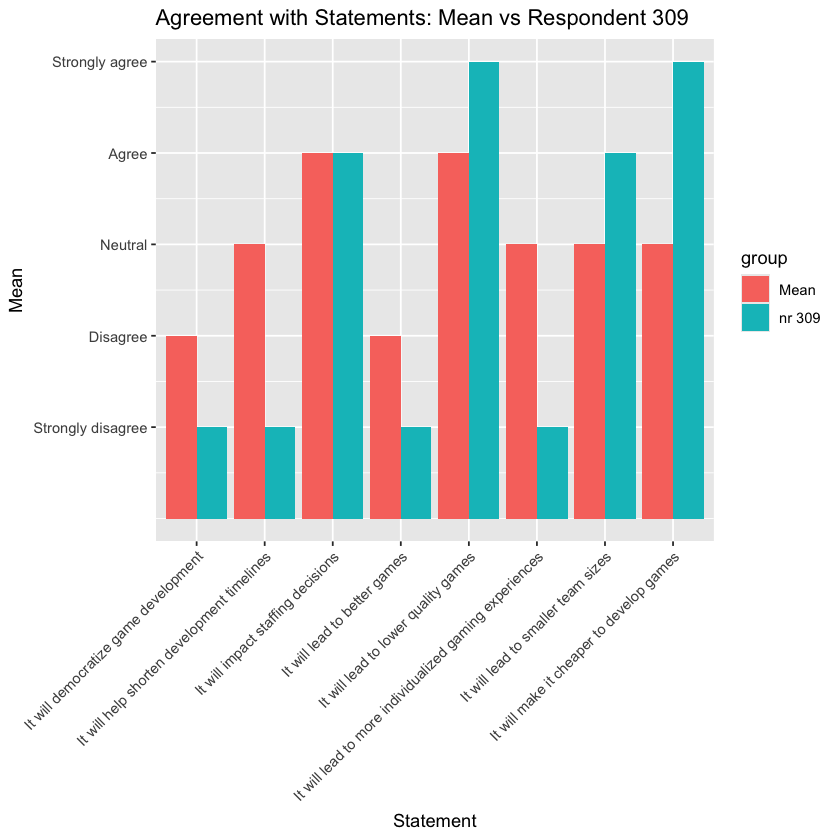

In [381]:
# Convert the answers to a score of 1 - 5
data[37:44] <- lapply(data[37:44], function(x) {
  x <- as.character(x)
  x[x == "Strongly agree"] <- 5
  x[x == "Agree"] <- 4
  x[x == "Neutral"] <- 3
  x[x == "Disagree"] <- 2
  x[x == "Strongly disagree"] <- 1
  as.numeric(x)
})

# Calculate the mean of the answers
mean_answers <- round(colMeans(data[37:44]))

# Create data frames for the mean answers and respondent 309's answers
df_mean <- data.frame(
  statement = names(mean_answers),
  mean = mean_answers,
  group = "Mean"
)
df_309 <- data.frame(
  statement = names(data[308, 37:44]),
  mean = as.numeric(data[308, 37:44]),
  group = "nr 309"
)

# Combine the data frames
df_combined <- bind_rows(df_mean, df_309)

# Create the combined plot
ggplot(df_combined, aes(x = statement, y = mean, fill = group)) +
  geom_bar(
    stat = "identity",
    position = "dodge"
  ) +
  labs(
    title = "Agreement with Statements: Mean vs Respondent 309",
    x = "Statement",
    y = "Mean"
  ) +
  scale_y_continuous(
    limits = c(0, 5),
    breaks = 1:5,
    labels = c(
      "Strongly disagree",
      "Disagree",
      "Neutral",
      "Agree",
      "Strongly agree"
    )
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )
